## 7. Position_Control
1/3,1/3,1/3

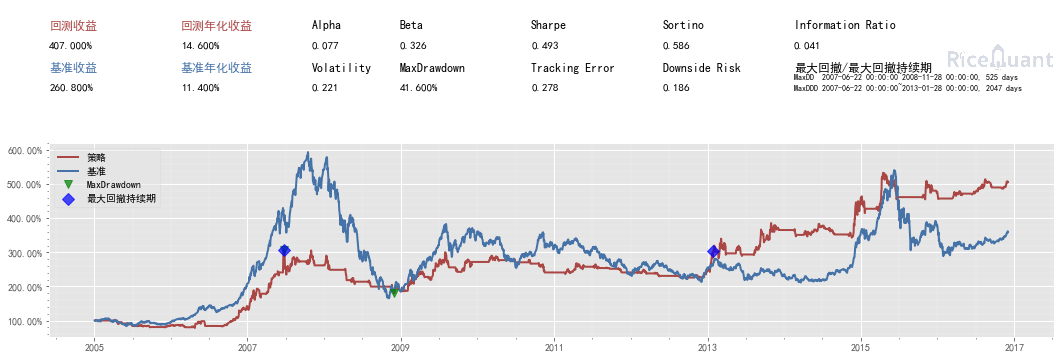

In [1]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import rqalpha
from rqalpha.api import *
import talib

def init(context):
    context.s1 = "000001.XSHE"
    context.SHORTPERIOD = 10
    context.LONGPERIOD = 30
    context.time = 0


def handle_bar(context, bar_dict):

    prices = history_bars(context.s1, context.LONGPERIOD+1, '1d', 'close')

    short_avg = talib.SMA(prices, context.SHORTPERIOD)
    long_avg = talib.SMA(prices, context.LONGPERIOD)

    cur_position = context.portfolio.positions[context.s1].quantity
    shares = context.portfolio.cash/bar_dict[context.s1].close

    if short_avg[-1] - long_avg[-1] < 0 and short_avg[-2] - long_avg[-2] > 0 and cur_position > 0:
        order_target_value(context.s1, 0)
        context.time=0

    if short_avg[-1] - long_avg[-1] > 0 and short_avg[-2] - long_avg[-2] < 0 and context.time==0:
        order_shares(context.s1, shares/3)
        context.time=1
    elif context.time == 1:
        order_shares(context.s1, shares/3)
        context.time=2
    elif context.time == 2:
        order_shares(context.s1, shares/3)
        context.time=3

"""

config = {
  "base": {
    "start_date": "2000-06-01",
    "end_date": "2016-12-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
     "report_save_path": '.',
      "enabled": True,
      "plot": True
    }
  }
}

run_code(code, config)

## 50/30/20

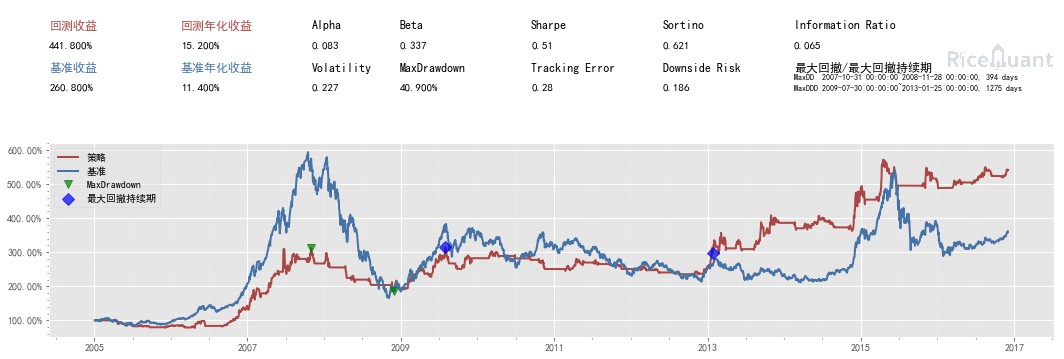

{'sys_analyser': {'benchmark_portfolio':               cash  market_value  static_unit_net_value  total_value  \
  date                                                                   
  2005-01-04  738.21      99261.79                  1.000    100000.00   
  2005-01-05  738.21     100248.56                  1.000    100986.77   
  2005-01-06  738.21      99300.17                  1.010    100038.38   
  2005-01-07  738.21      99379.96                  1.000    100118.17   
  2005-01-10  738.21     100381.88                  1.001    101120.09   
  2005-01-11  738.21     100711.14                  1.011    101449.35   
  2005-01-12  738.21     100671.75                  1.014    101409.96   
  2005-01-13  738.21     100684.88                  1.014    101423.09   
  2005-01-14  738.21      99819.31                  1.014    100557.52   
  2005-01-17  738.21      97712.45                  1.006     98450.66   
  2005-01-18  738.21      98443.69                  0.985     99181.90   

In [3]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import rqalpha
from rqalpha.api import *
import talib

def init(context):
    context.s1 = "000001.XSHE"
    context.SHORTPERIOD = 10
    context.LONGPERIOD = 30
    context.time = 0


def handle_bar(context, bar_dict):

    prices = history_bars(context.s1, context.LONGPERIOD+1, '1d', 'close')

    short_avg = talib.SMA(prices, context.SHORTPERIOD)
    long_avg = talib.SMA(prices, context.LONGPERIOD)

    cur_position = context.portfolio.positions[context.s1].quantity
    shares = context.portfolio.cash/bar_dict[context.s1].close

    if short_avg[-1] - long_avg[-1] < 0 and short_avg[-2] - long_avg[-2] > 0 and cur_position > 0:
        order_target_value(context.s1, 0)
        context.time=0

    if short_avg[-1] - long_avg[-1] > 0 and short_avg[-2] - long_avg[-2] < 0 and context.time==0:
        order_shares(context.s1, shares*0.5)
        context.time=1
    elif context.time == 1:
        order_shares(context.s1, shares*0.3)
        context.time=2
    elif context.time == 2:
        order_shares(context.s1, shares*0.2)
        context.time=3

"""

config = {
  "base": {
    "start_date": "2000-06-01",
    "end_date": "2016-12-01",
    "securities": ['stock'],
    "stock_starting_cash": 100000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
     "report_save_path": '.',
      "enabled": True,
      "plot": True
    }
  }
}

run_code(code, config)

# 50/30/20/-50/-30/-20

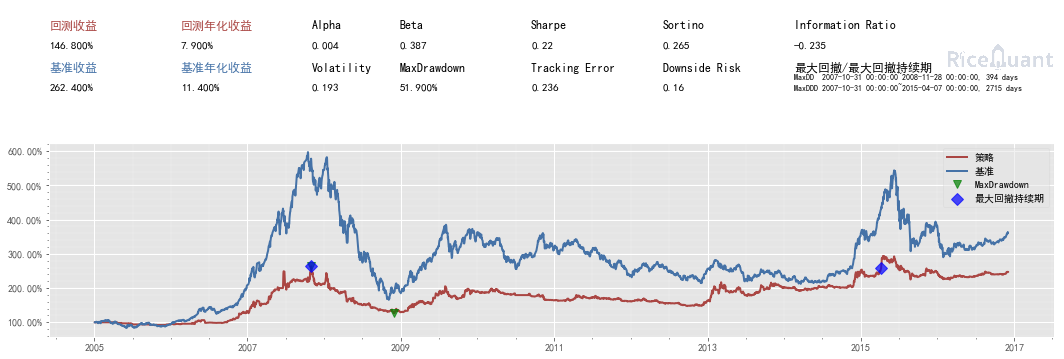

In [1]:
#coding=utf-8
# run_code_demo
from rqalpha import run_code

code = """
import rqalpha
from rqalpha.api import *
from queue import Queue
import talib

def init(context):
    context.s1 = "000001.XSHE"
    context.SHORTPERIOD = 10
    context.LONGPERIOD = 30
    context.pos = [5000, 3000, 2000]
    context.queue = Queue()
    context.buy=0
    context.sell=0


def buy(context):
    prices = history_bars(context.s1, context.LONGPERIOD+1, '1d', 'close')
    short_avg = talib.SMA(prices, context.SHORTPERIOD)
    long_avg = talib.SMA(prices, context.LONGPERIOD)
    if short_avg[-1] - long_avg[-1] > 0 and short_avg[-2] - long_avg[-2] < 0:
        return True


def sell(context):
    prices = history_bars(context.s1, context.LONGPERIOD+1, '1d', 'close')
    short_avg = talib.SMA(prices, context.SHORTPERIOD)
    long_avg = talib.SMA(prices, context.LONGPERIOD)
    cur_position = context.portfolio.positions[context.s1].quantity
    if short_avg[-1] - long_avg[-1] < 0 and short_avg[-2] - long_avg[-2] > 0 and cur_position > 0:
        return True


def handle_bar(context, bar_dict):
    size = context.queue.qsize()
    if size == 0:
        if buy(context):
            context.buy=1
            volume = context.pos[size]
            ## order volume
            order_shares(context.s1, volume)
            context.queue.put(volume)
            return

    if context.buy:
        if sell(context):
            context.sell=1
            context.buy=0
        elif size < 3:
            volume = context.pos[size]
            ## order volume
            order_shares(context.s1, volume)
            context.queue.put(volume)

    if context.sell:
        if size > 0:
            volume = context.queue.get()
            ## sell volume
            order_shares(context.s1, -volume)
        else:
            context.sell=0
"""

config = {
  "base": {
    "start_date": "2000-06-01",
    "end_date": "2016-12-01",
    "securities": ['stock'],
    "stock_starting_cash": 250000,
    "benchmark": "000300.XSHG"
#     "strategy_file_path": os.path.abspath(__file__)
  },
  "extra": {
    "log_level": "verbose",
  },
  "mod": {
    "sys_analyser": {
     "report_save_path": '.',
      "enabled": True,
      "plot": True
    }
  }
}

run_code(code, config)